In [211]:
# Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их 
# успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
from scipy import stats

stud = pd.read_csv('stud_math.csv')


def column_info(column): # основные параметры колонки
    display(pd.DataFrame(stud[column].value_counts().sort_values(ascending=False)))
    stud.loc[:, [column]].info()
    display(stud[column].describe())

def outliers(column): # проверка на выбросы
    IQR = stud[column].quantile(0.75) - stud[column].quantile(0.25)
    perc25 = stud[column].quantile(0.25)
    perc75 = stud[column].quantile(0.75)
    low_outlier = perc25 - 1.5*IQR
    high_outlier = perc75 + 1.5*IQR
    print("Границы выбросов: [{f}, {l}].".format(f=low_outlier, l=high_outlier))

    if min(stud[column]) > low_outlier:
        print('THERE ARE NO data below outliers')
    else:
            print('THERE ARE data below outliers')
    if max(stud[column]) < high_outlier:
        print('THERE ARE NO data upon outliers')
    else:
        print('THERE ARE data upon outliers')
    
def outliers_to_quantiles(column): # замена выбросов квантилями
    IQR = stud[column].quantile(0.75) - stud[column].quantile(0.25)
    perc25 = stud[column].quantile(0.25)
    perc75 = stud[column].quantile(0.75)
    low_outlier = perc25 - 1.5*IQR
    high_outlier = perc75 + 1.5*IQR
    stud[column][stud[column] < low_outlier] = perc25
    stud[column][stud[column] > high_outlier] = perc75
    
def delete_outliers(column): # замена выбросов квантилями
    IQR = stud[column].quantile(0.75) - stud[column].quantile(0.25)
    perc25 = stud[column].quantile(0.25)
    perc75 = stud[column].quantile(0.75)
    low_outlier = perc25 - 1.5*IQR
    high_outlier = perc75 + 1.5*IQR
    stud[column][stud[column] < low_outlier] = None
    stud[column][stud[column] > high_outlier] = None

def corr_heatmap(): #  для построения корреляционной таблицы
    plt.figure(figsize=(12, 6))
    heatmap = sns.heatmap(stud.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

def get_boxplot(column, frequency): # построение boxplot графика
    fig, ax = plt.subplots(figsize = (14, 7))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:frequency])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

def get_boxplots(frequency): # построение графиков для номинотивных показателей (допускаем что все не текстовые столбцы не номинотивные)
    for col in stud.select_dtypes('object').columns:
        get_boxplot(col, frequency)
    
def get_stat_dif(column):  # теста Стьюдента
    cols = stud.loc[:, column].value_counts().index[:20]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'].dropna(),
                     stud.loc[stud.loc[:, column] == comb[1], 'score'].dropna()).pvalue \
                <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            print(column, 'combination', comb, 'p-value is',
                  round(ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'].dropna(),
                    stud.loc[stud.loc[:, column] == comb[1], 'score'].dropna()).pvalue, 3)
                 )

In [213]:
pd.set_option('max_columns', None)
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

([<matplotlib.patches.Wedge at 0x21204e19220>,
 [Text(-1.0271995431128091, 0.3935239492443079, 'GP'),
  Text(1.0271995707460848, -0.39352387711428577, 'MS')],
 [Text(-0.5602906598797139, 0.21464942686053154, '88.4%'),
  Text(0.5602906749524098, -0.21464938751688312, '11.6%')])

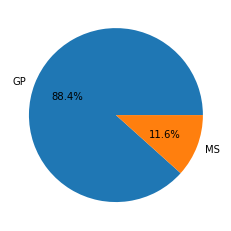

In [214]:
#  school
column_info('school')
plt.pie(
    stud.school.value_counts(), 
    labels = stud.school.unique(),
    autopct='%1.1f%%'
)

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

([<matplotlib.patches.Wedge at 0x21204518dc0>,
 [Text(-0.09175509895664602, 1.096166502779325, 'F'),
  Text(0.09175520158716051, -1.096166494188588, 'M')],
 [Text(-0.050048235794534185, 0.5979090015159955, '52.7%'),
  Text(0.05004829177481482, -0.5979089968301389, '47.3%')])

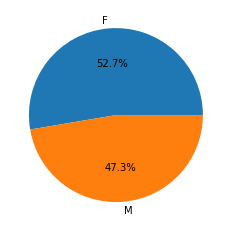

In [215]:
# sex
column_info('sex')
plt.pie(
    stud.sex.value_counts(), 
    labels = stud.sex.unique(),
    autopct='%1.1f%%'
)

In [216]:
# age
column_info('age')
outliers('age')

,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Границы выбросов: [13.0, 21.0].
THERE ARE NO data below outliers
THERE ARE data upon outliers


In [261]:
# Удаляем выбросы
delete_outliers('age')
stud.age.value_counts()

<ipython-input-212-ae6e127504b3>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud[column][stud[column] < low_outlier] = None
<ipython-input-212-ae6e127504b3>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud[column][stud[column] > high_outlier] = None


16.0    104
17.0     98
15.0     82
18.0     82
19.0     24
20.0      3
21.0      1
Name: age, dtype: int64

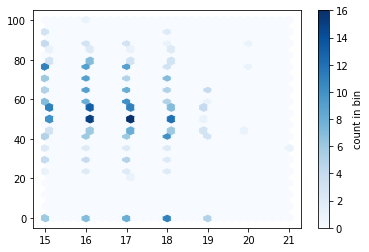

In [218]:
# Строим график чтоб посмотреть как распределяются оценки по возрасту
plt.hexbin(stud.age, stud.score, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

In [219]:
# Видим что сильного разборса в оценках в зависимости от восраста ненаблюдается

In [220]:
# addres
column_info('address')

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     378
unique      2
top         U
freq      295
Name: address, dtype: object

In [221]:
# famsize размер семьи('LE3' <= 3, 'GT3' >3)
column_info('famsize')

,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

In [222]:
# Pstatus статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
column_info('Pstatus')

,Pstatus
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     350
unique      2
top         T
freq      314
Name: Pstatus, dtype: object

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Границы выбросов: [-1.0, 7.0].
THERE ARE NO data below outliers
THERE ARE NO data upon outliers


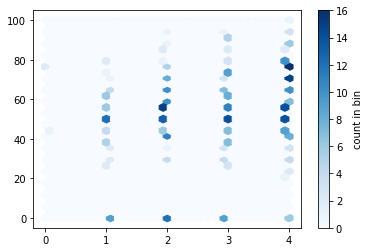

In [223]:
#  Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
column_info('Medu')
outliers('Medu')
plt.hexbin(stud.Medu, stud.score, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

In [224]:
# Видим что у матерей с вышем образованием дети получают оценки выше

In [225]:
#  Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
column_info('Fedu')
outliers('Fedu')

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

Границы выбросов: [0.5, 4.5].
THERE ARE data below outliers
THERE ARE data upon outliers


In [226]:
# Удаляем ошибочное значение которое не может быть больше 4
stud.Fedu[stud['Fedu'] > 4] = None

<ipython-input-226-31a9affe6448>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.Fedu[stud['Fedu'] > 4] = None


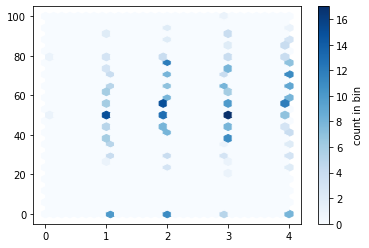

In [227]:
plt.hexbin(stud.Fedu, stud.score, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

In [228]:
# С образованием отца график не показывает такого явного различия как у матерей

In [229]:
# Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 
# 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
column_info('Mjob')

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count       376
unique        5
top       other
freq        133
Name: Mjob, dtype: object

In [230]:
# Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 
# 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
column_info('Fjob')

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object

In [231]:
# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 
# 'course' - образовательная программа, 'other' - другое)
column_info('reason')

,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

In [232]:
# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
column_info('guardian')

,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

In [233]:
# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
column_info('traveltime')

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [234]:
# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов,
# 3 - 5-10 часов, 4 - >10 часов)
column_info('studytime')

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [235]:
# failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
column_info('failures')

,failures
0.0,293
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

In [236]:
# schoolsup — дополнительная образовательная поддержка (yes или no)
column_info('schoolsup')

,schoolsup
no,335
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

In [237]:
# famsup — семейная образовательная поддержка (yes или no)
column_info('famsup')

,famsup
yes,219
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

In [238]:
# paid — дополнительные платные занятия по математике (yes или no)
column_info('paid')

,paid
no,200
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

In [239]:
# activities — дополнительные внеучебные занятия (yes или no)
column_info('activities')

,activities
yes,195
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

In [240]:
# nursery — посещал детский сад (yes или no)
column_info('nursery')

,nursery
yes,300
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

In [241]:
#  higher — хочет получить высшее образование (yes или no)
column_info('higher')

,higher
yes,356
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object

In [242]:
#  internet — наличие интернета дома (yes или no)
column_info('internet')

,internet
yes,305
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

In [243]:
#  famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
column_info('famrel')

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [244]:
# Удаляем ошибочное значение которое не может быть меньше 1
stud.famrel[stud['famrel'] < 1] = None

<ipython-input-244-17660c2081c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.famrel[stud['famrel'] < 1] = None


In [245]:
# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
column_info('goout')

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

In [246]:
# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
column_info('health')

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Границы выбросов: [-12.0, 20.0].
THERE ARE NO data below outliers
THERE ARE data upon outliers


<AxesSubplot:>

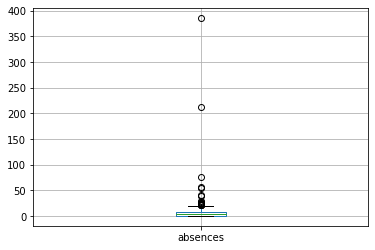

In [247]:
# absences — количество пропущенных занятий
column_info('absences')
outliers('absences')
stud.loc[:, ['absences']].boxplot()

<ipython-input-212-ae6e127504b3>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud[column][stud[column] < low_outlier] = perc25
<ipython-input-212-ae6e127504b3>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud[column][stud[column] > high_outlier] = perc75


<AxesSubplot:>

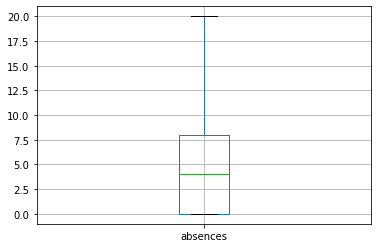

In [248]:
# так как верхних выбросов очень много, заменим их квантилями
outliers_to_quantiles('absences')
stud.loc[:, ['absences']].boxplot()

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,31
45.0,27
70.0,27
80.0,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Границы выбросов: [-5.0, 115.0].
THERE ARE NO data below outliers
THERE ARE NO data upon outliers


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

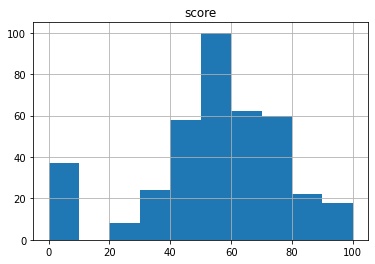

In [249]:
# score — баллы по госэкзамену по математике
column_info('score')
outliers('score')
stud.loc[:, ['score']].hist()

In [250]:
# Предположим что случаи score == 0 это тоже реальные оценки

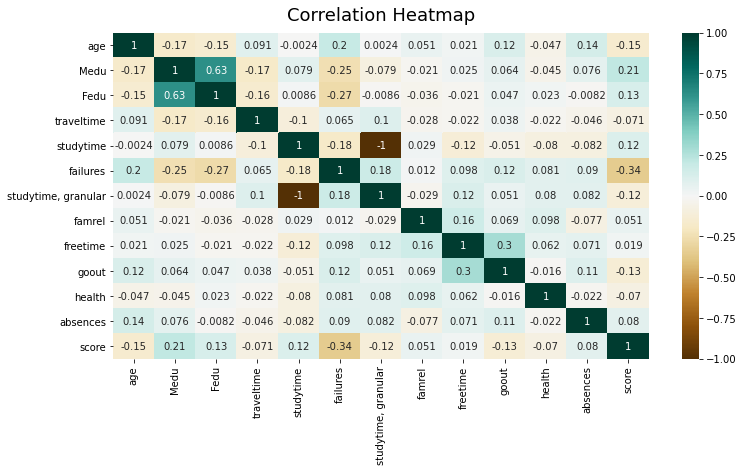

In [251]:
# Корреляционный анализ

corr_heatmap()

In [252]:
# Удалим дублируемые сильно коррелирующие переменные и не коррелирующие переменные 
stud.drop(['studytime, granular', 'famrel', 'freetime', 'traveltime', 'health', 'absences'], inplace = True, axis = 1)

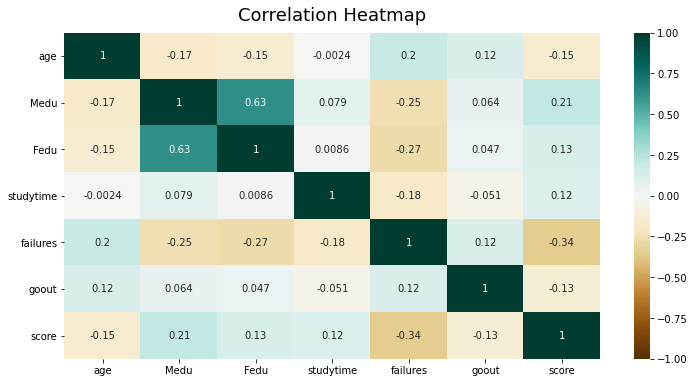

In [253]:
corr_heatmap()

# Видим что показатель failures имеет отрицательную корреляцию.
# Видимо если у ученика есть прочие неудачи, то и оценки по математике хуже.

# Так же видим что есть небольшая положительная корреляция с показателями Medu и Fedu.
# Причём образование матери сильнее связано с успеваемостью ученика по математике, чем образование отцта.
# (Если конечно можем расматривать эти показатели как не номинативные)

# Так же, можно сделать вывод, что у тех кто больше времени проводит с друзьями оценки хуже.
# У тех, кто больше тратит время на учёбу - лучше.
# Однако между собой время потраченное на учёбу и время с друзьями слабо коррелируют.

In [254]:
# Анализ номинативных переменных

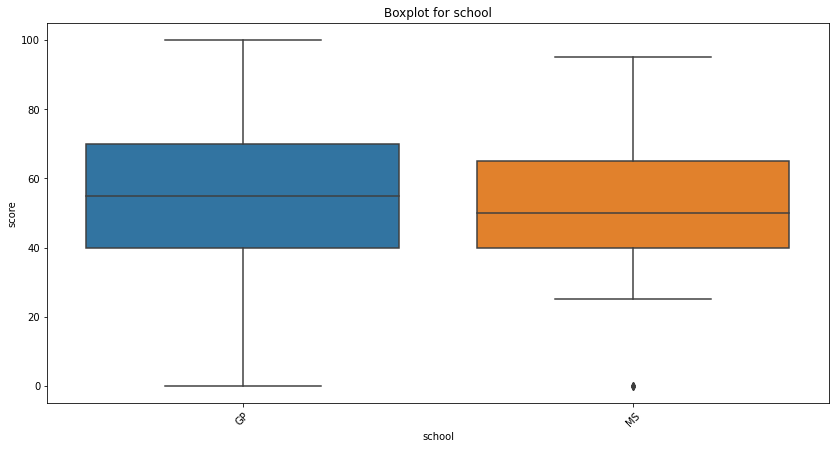

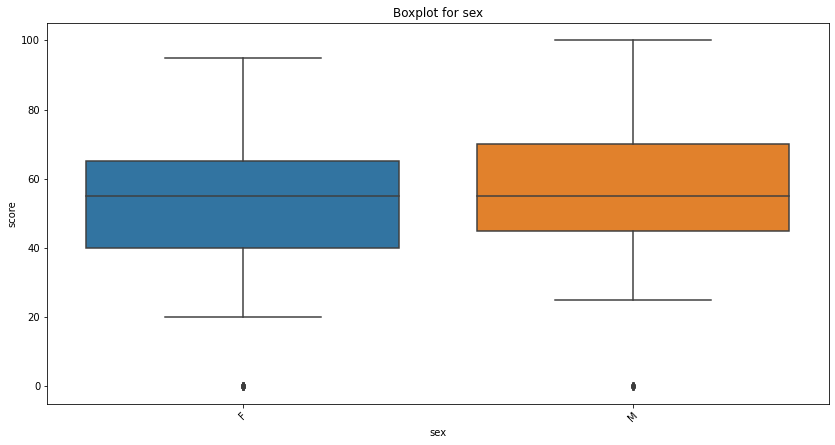

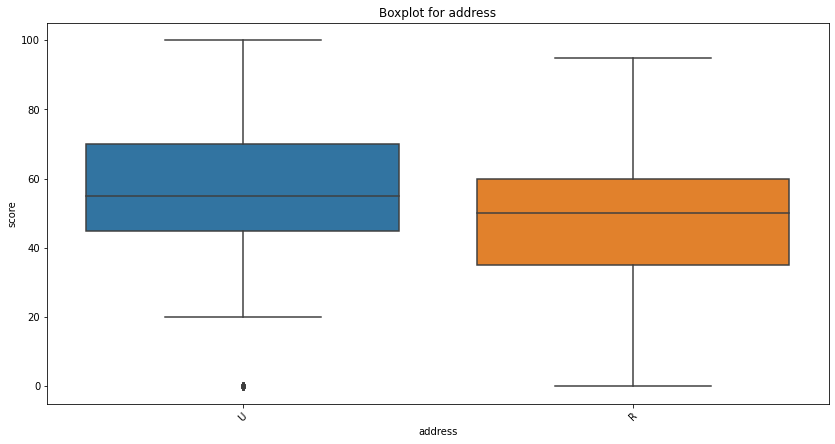

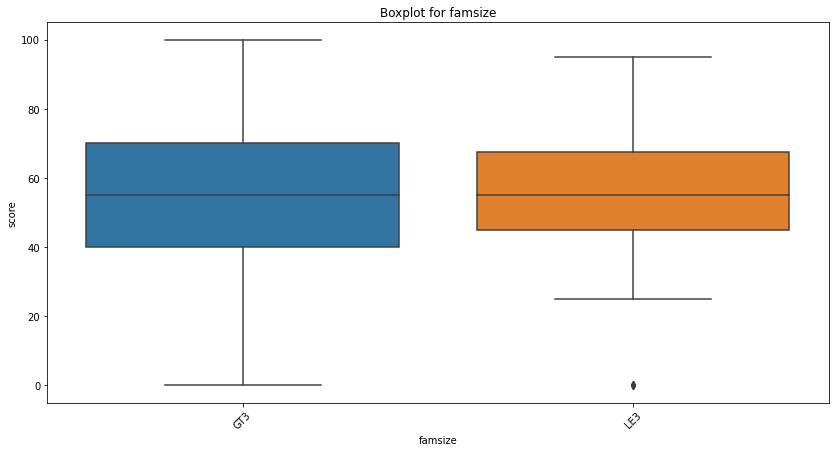

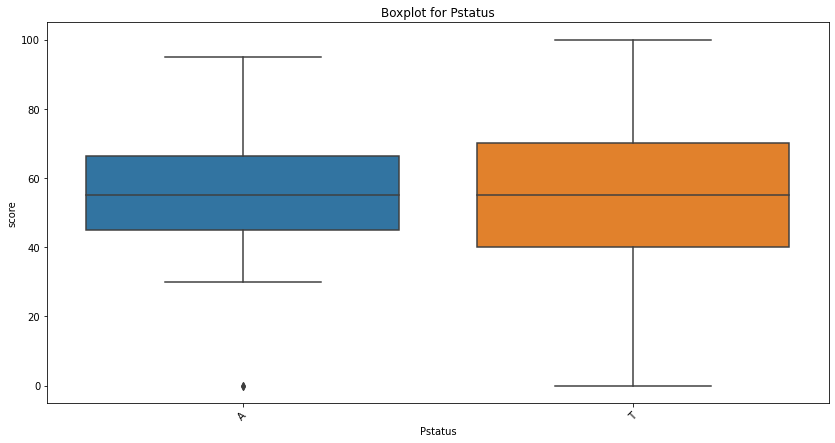

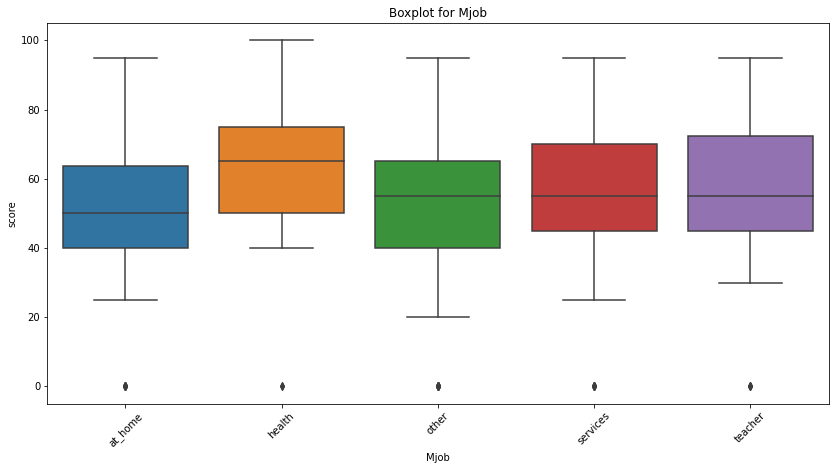

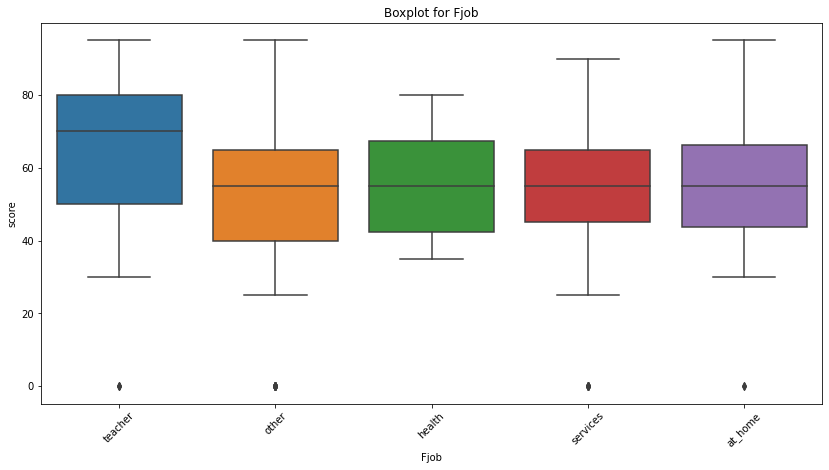

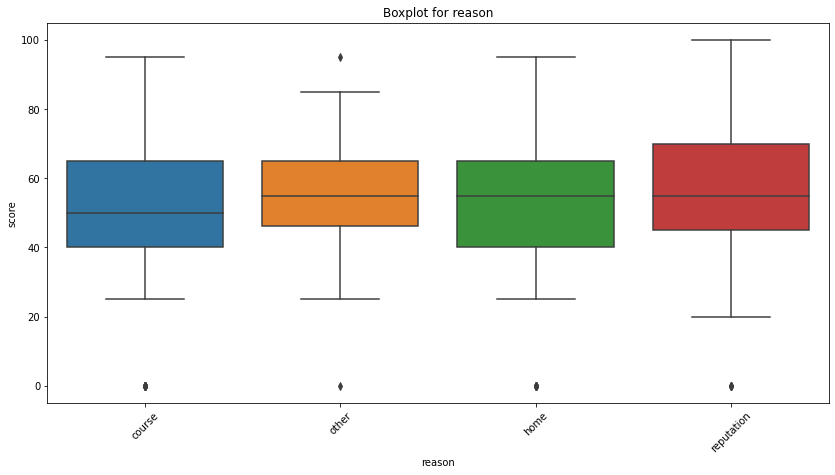

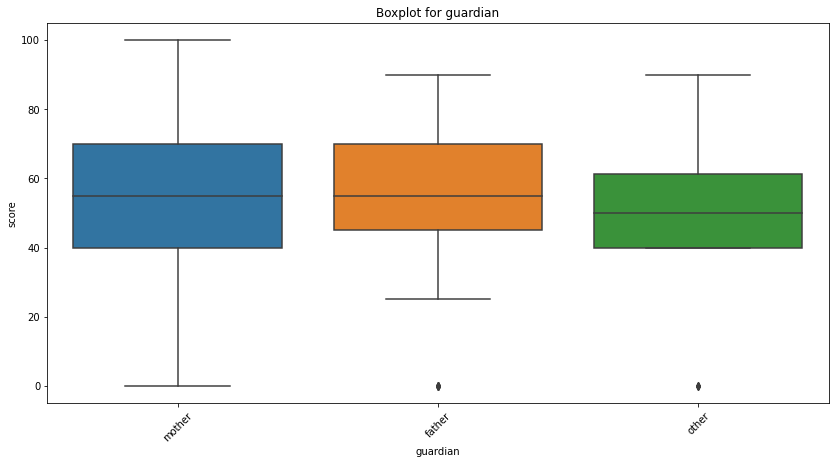

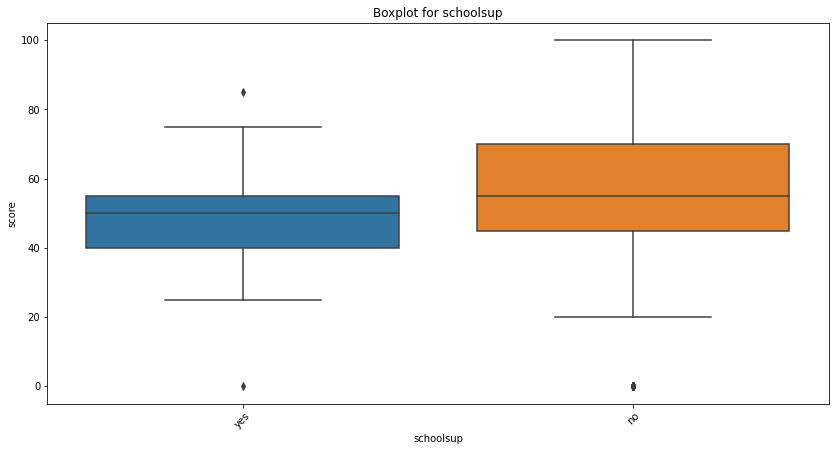

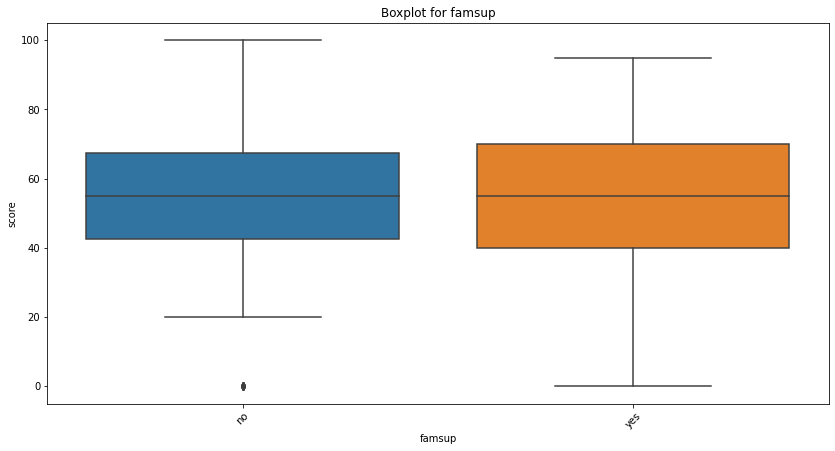

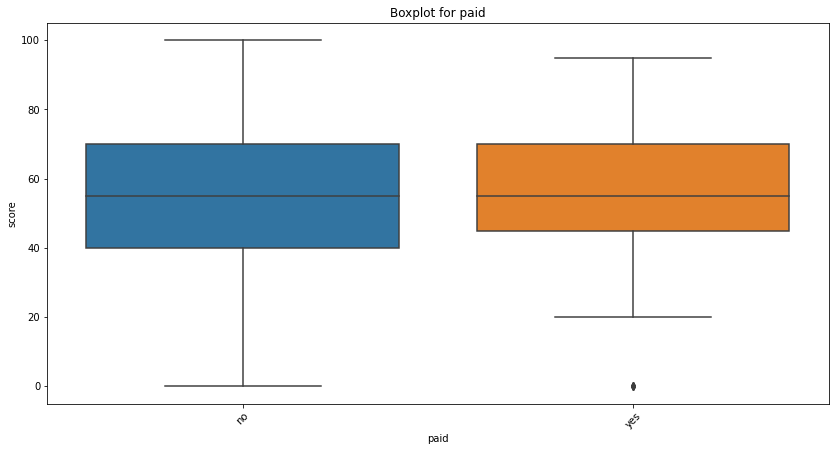

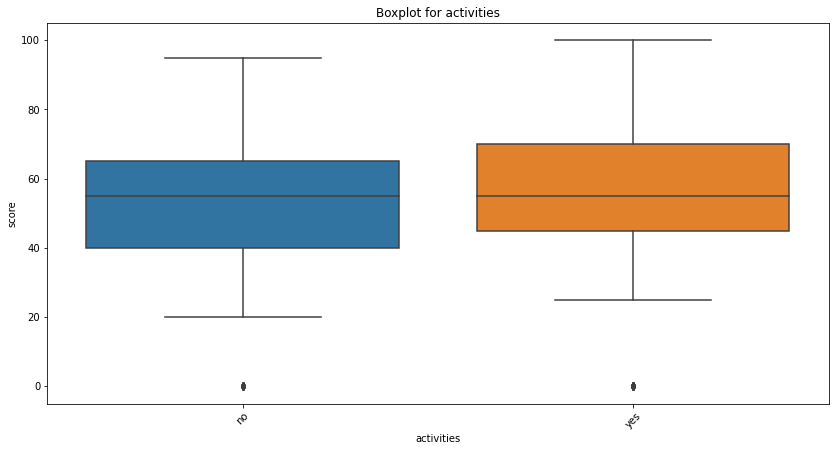

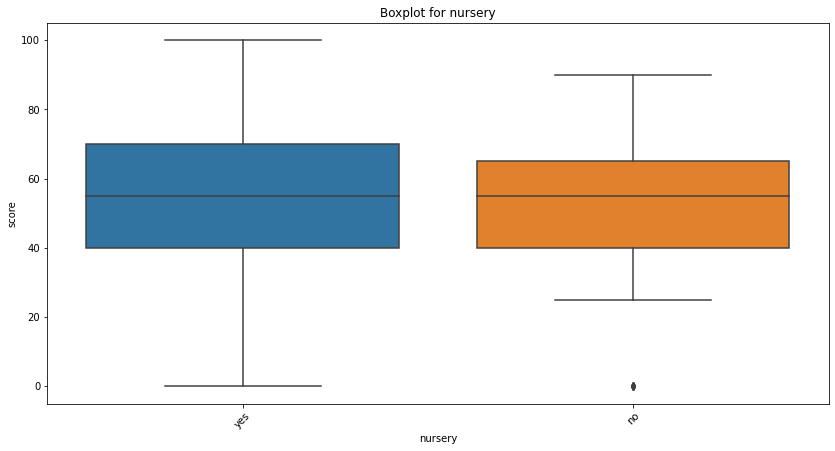

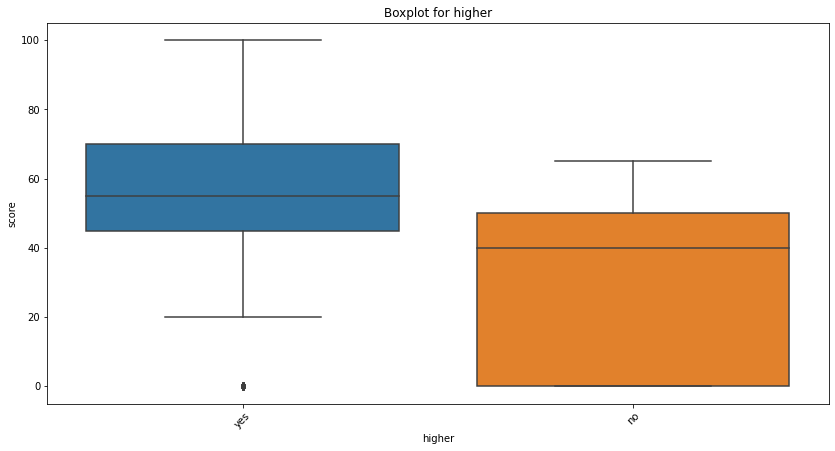

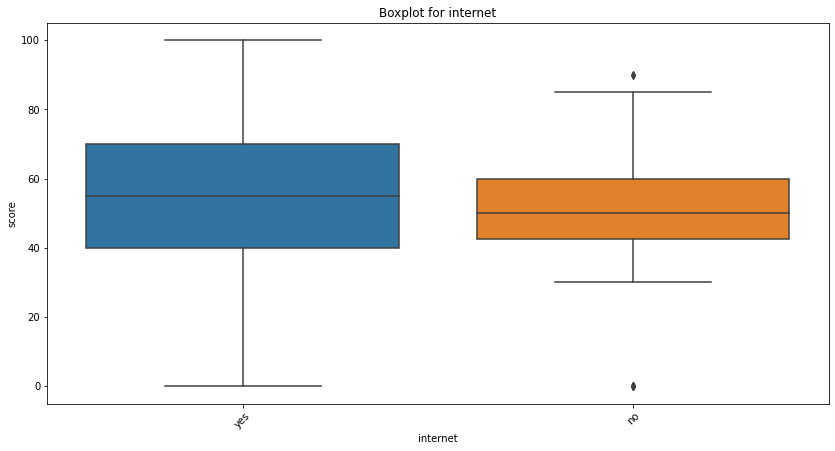

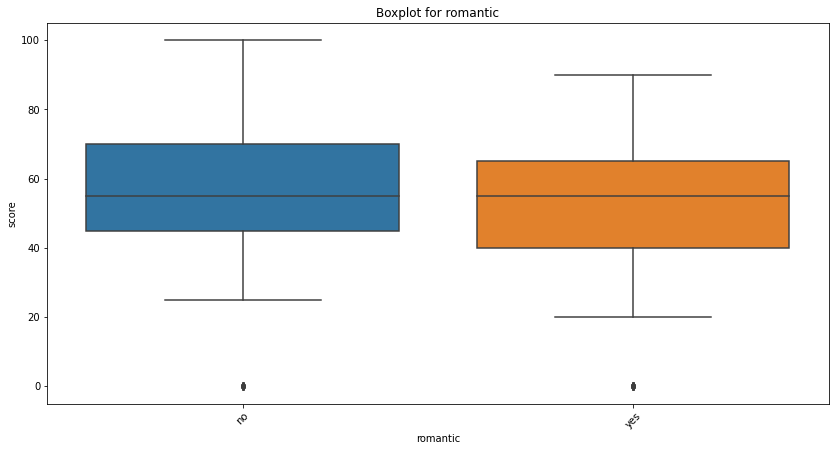

In [255]:
# Pазличаются ли распределения рейтинга в зависимости от номинативных переменных переменных

get_boxplots(10)

In [256]:
# С помощью теста Стьюдента проверим нулевую гипотезу о том, 
# что распределения оценок по различным параметрам неразличимы

for col in stud.select_dtypes('object').columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
address combination ('U', 'R') p-value is 0.02
Найдены статистически значимые различия для колонки Mjob
Mjob combination ('at_home', 'health') p-value is 0.004
Найдены статистически значимые различия для колонки higher
higher combination ('yes', 'no') p-value is 0.0
Найдены статистически значимые различия для колонки romantic
romantic combination ('no', 'yes') p-value is 0.007


In [257]:
# Устраняем номинативные переменные которые не влияют на оценки

stud.drop(['school', 'sex', 'famsize', 'Pstatus', 'Fjob', 'reason', 'guardian', 'schoolsup',
           'famsup', 'paid', 'activities', 'nursery', 'internet'],
          inplace = True, axis = 1)

In [258]:
stud.head(10)

,age,address,Medu,Fedu,Mjob,studytime,failures,higher,romantic,goout,score
0,18.0,U,4.0,4.0,at_home,2.0,0.0,yes,no,4.0,30.0
1,17.0,U,1.0,1.0,at_home,2.0,0.0,yes,no,3.0,30.0
2,15.0,U,1.0,1.0,at_home,2.0,3.0,yes,NaN,2.0,50.0
3,15.0,U,4.0,2.0,health,3.0,0.0,yes,yes,2.0,75.0
4,16.0,U,3.0,3.0,other,2.0,0.0,yes,no,2.0,50.0
5,16.0,U,4.0,3.0,services,2.0,0.0,yes,no,2.0,75.0
6,16.0,NaN,2.0,2.0,other,2.0,0.0,yes,no,4.0,55.0
7,17.0,U,4.0,4.0,other,2.0,0.0,yes,no,4.0,30.0
8,15.0,U,3.0,2.0,services,2.0,0.0,yes,no,2.0,95.0
9,15.0,U,3.0,4.0,other,2.0,0.0,yes,no,1.0,75.0


In [259]:
# Выводы

print(
    '''Выводы:
    1) Показатель failures имеет отрицательную корреляцию. 
Видимо если у ученика есть прочие неудачи, то и оценки по математике хуже.
    2) Есть небольшая положительная корреляция с показателями Medu и Fedu. 
Причём образование матери сильнее связано с успеваемостью ученика по математике, чем образование отцта.
    3) Номинотивные переменные влияющие на оценки: address, Mjob, higher, romantic.'''
)

Выводы:
    1) Показатель failures имеет отрицательную корреляцию. 
Видимо если у ученика есть прочие неудачи, то и оценки по математике хуже.
    2) Есть небольшая положительная корреляция с показателями Medu и Fedu. 
Причём образование матери сильнее связано с успеваемостью ученика по математике, чем образование отцта.
    3) Номинотивные переменные влияющие на оценки: address, Mjob, higher, romantic.
